<a href="https://colab.research.google.com/github/Dhaneshkp/DesktopAssistant/blob/main/TensorFlow_1DCNN_orderv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import math
Everst_data=pd.read_csv('average_premium.csv')
data=Everst_data
data['Attained_age']=data['Age']+data['Duration']
data['Premium_rate']=data['BasePremiumAmount']/data['BaseNARAmount']*10000
#exclude_cols = ['Gender','RiskClass']
Coulmns_to_keep=['Age','Premium_rate','Gender','RiskClass','Duration']
#data=data[data['SingleOrJointType']=="Single"]
#data=data[data['Gender']=="Male"]
#data=data[data['RiskClass']=="NS1"]
data=data[Coulmns_to_keep]
data=data[(data['RiskClass']!="SS1") & (data['RiskClass']!="SS2")& (data['RiskClass']!="SP1")]
data['index']=data.index
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
data_copy=data.copy()
data['Premium_rate']=data['Premium_rate'].apply(apply_ln)


<ipython-input-73-8f9c30dc9a23>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index']=data.index


In [74]:
def apply_ln(x):
    if x <= 0:
        return 0
    else:
        return math.log(x)

In [75]:
# Create a multi-index dataframe using Age, Duration, and a combined Gender and RiskClass column

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
data['RiskClass'] = data['RiskClass'].replace({'N+1': 'NP2', 'NP1': 'NP2'}).replace({'NS3': 'NS2', 'NS2': 'NS2', 'NR1': 'NS2', 'NS1' : 'NS2'})
print(data)
print(data['RiskClass'].unique())
multi_index_df = data.set_index(['Age', 'Duration', data['Gender'] + '_' + data['RiskClass']])

# Convert the multi-index dataframe to a regular dataframe
result_df = multi_index_df.reset_index().drop(['Gender', 'RiskClass'], axis=1)
print(result_df)
result_df['level_2'].unique()
result_df=result_df[result_df['level_2']!='NaN'].dropna()

         Age  Premium_rate  Gender RiskClass  Duration    index
0         52      3.493008  Female       NP2         8        0
1         25      2.056969    Male       NP2         7        1
2         20      1.292042  Female       NS2         8        2
4         38      2.464596    Male       NP2         8        4
5         30      1.701221    Male       NS2         8        5
...      ...           ...     ...       ...       ...      ...
1611670   42      2.649075  Female       NS2         8  1611670
1611671   26      2.133183    Male       NP2         8  1611671
1611672   30      1.698669    Male       NP2         8  1611672
1611673   43      2.781478    Male       NP2         8  1611673
1611675   58      4.319231    Male       NS2         7  1611675

[1474122 rows x 6 columns]
['NP2' 'NS2']
         Age  Duration     level_2  Premium_rate    index
0         52         8  Female_NP2      3.493008        0
1         25         7    Male_NP2      2.056969        1
2         20    

In [76]:
# apply stratified samplingn to retrun 20% data  where the groups of age_duration_gender riskclass has similar set of recoords

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(result_df, result_df['level_2']):
  strat_train_set = result_df.loc[train_index]
  strat_test_set = result_df.loc[test_index]


In [77]:
# prompt: for the dsata  result_df_no_na one hot encode the level_2

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

# Before removing NAs
print("Before removing NAs:")
print(strat_train_set.describe(include='all'))
print(strat_train_set.count())

# Drop rows with missing values
result_df_no_na = strat_train_set.dropna()

# After removing NAs
print("\nAfter removing NAs:")
print(result_df_no_na.describe(include='all'))
print(result_df_no_na.count())


Before removing NAs:
                 Age      Duration     level_2  Premium_rate         index
count   1.179297e+06  1.179297e+06     1179297  1.179297e+06  1.179297e+06
unique           NaN           NaN           4           NaN           NaN
top              NaN           NaN  Female_NP2           NaN           NaN
freq             NaN           NaN      353563           NaN           NaN
mean    3.726661e+01  4.559350e+00         NaN  1.988795e+00  8.059706e+05
std     1.118757e+01  2.523417e+00         NaN  9.749210e-01  4.650281e+05
min     1.700000e+01  1.000000e+00         NaN -6.851185e+00  0.000000e+00
25%     2.800000e+01  2.000000e+00         NaN  1.374318e+00  4.031770e+05
50%     3.600000e+01  4.000000e+00         NaN  1.941517e+00  8.061670e+05
75%     4.500000e+01  6.000000e+00         NaN  2.532268e+00  1.208389e+06
max     7.000000e+01  1.100000e+01         NaN  7.525860e+00  1.611672e+06
Age             1179297
Duration        1179297
level_2         1179297
Premium

In [78]:
result_df_encoded=result_df_no_na
result_df_encoded['level_2_Female_NP2']=(result_df_encoded['level_2']=='Female_NP2').astype(int)
result_df_encoded['level_2_Male_NP2']=(result_df_encoded['level_2']=='Male_NP2').astype(int)
result_df_encoded['level_2_Male_NS2']=(result_df_encoded['level_2']=='Male_NS2').astype(int)
#result_df_encoded = pd.concat([result_df_no_na, encoded_df], axis=1)

# Optionally, drop the original 'level_2' column

result_df_encoded = result_df_encoded.drop('level_2', axis=1)
print(result_df_encoded)

         Age  Duration  Premium_rate    index  level_2_Female_NP2  \
545368    42         5      2.326219   596562                   1   
638917    29         4      1.343044   698821                   0   
846369    33         4      1.223185   925363                   1   
1423532   39         6      2.236310  1556447                   1   
38248     19         5      2.241722    41890                   0   
...      ...       ...           ...      ...                 ...   
333354    30         5      1.362197   364538                   1   
474298    31         5      1.488077   518857                   0   
547135    33         2      0.238892   598495                   1   
345902    35         5      1.714084   378250                   1   
753082    31         7      1.686371   823531                   0   

         level_2_Male_NP2  level_2_Male_NS2  
545368                  0                 0  
638917                  0                 0  
846369                  0        

In [79]:
# prompt: instead of the encoder above do the same finding the minimu and maximum values for contonous value columns , scale the variable using the maximum value s

# Assuming 'result_df_no_na' is your DataFrame from the preceding code

# Identify continuous value columns
continuous_cols = ['Age', 'Duration', 'Premium_rate']  # Replace with actual column names

# Calculate minimum and maximum values for each continuous column
min_values = result_df_encoded[continuous_cols].min()
max_values = result_df_encoded[continuous_cols].max()

# Scale the continuous variables using maximum values
for col in continuous_cols:
    result_df_encoded[col] = result_df_encoded[col] / max_values[col]

# Display the scaled DataFrame
print(result_df_encoded)
max_values

              Age  Duration  Premium_rate    index  level_2_Female_NP2  \
545368   0.600000  0.454545      0.309097   596562                   1   
638917   0.414286  0.363636      0.178457   698821                   0   
846369   0.471429  0.363636      0.162531   925363                   1   
1423532  0.557143  0.545455      0.297150  1556447                   1   
38248    0.271429  0.454545      0.297869    41890                   0   
...           ...       ...           ...      ...                 ...   
333354   0.428571  0.454545      0.181002   364538                   1   
474298   0.442857  0.454545      0.197729   518857                   0   
547135   0.471429  0.181818      0.031743   598495                   1   
345902   0.500000  0.454545      0.227759   378250                   1   
753082   0.442857  0.636364      0.224077   823531                   0   

         level_2_Male_NP2  level_2_Male_NS2  
545368                  0                 0  
638917             

Age             70.00000
Duration        11.00000
Premium_rate     7.52586
dtype: float64

In [80]:
# prompt: use a hyper parameter search on the model using CNN , og the data set ; use convolutional newral nets directly not through keras regressor, use a for loop instaed of using gridsearch and parameters its not working

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data_test=result_df_encoded.head(400000)
data_test.sort_values(by=['Age', 'Duration','level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2'],inplace=True)
data_train=result_df_encoded.tail(100000)
data_train.sort_values(by=['Age', 'Duration','level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2'],inplace=True)


# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42,shuffle=False)


<ipython-input-80-9ea357a253ff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.sort_values(by=['Age', 'Duration','level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2'],inplace=True)
<ipython-input-80-9ea357a253ff>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.sort_values(by=['Age', 'Duration','level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2'],inplace=True)


In [81]:

# Split the data into features (X) and target variable (y)
X_train= data_test.drop(['Premium_rate','index'], axis=1)
y_train = data_test['Premium_rate']

X_test= data_train.drop(['Premium_rate','index'], axis=1)
y_test = data_train['Premium_rate']

# Reshape the input data for CNN (samples, timesteps, features)

In [82]:
X_train_np= X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_np= X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_np= y_train.values.reshape(y_train.shape[0], 1)
y_test_np= y_test.values.reshape(y_test.shape[0], 1)

In [83]:
X_test

,Age,Duration,level_2_Female_NP2,level_2_Male_NP2,level_2_Male_NS2
549257,0.257143,0.090909,0,0,0
239409,0.257143,0.090909,0,0,0
713871,0.257143,0.090909,0,0,0
262425,0.257143,0.090909,0,0,0
832941,0.257143,0.090909,0,0,0
...,...,...,...,...,...
825135,1.000000,0.909091,0,0,0
1269150,1.000000,0.909091,0,0,0
790899,1.000000,0.909091,0,0,1
1286878,1.000000,0.909091,0,0,1


In [84]:
from tensorflow.keras.callbacks import EarlyStopping
# Hyperparameter options
filters_list = [16]
kernel_sizes_list = [2,3]
dense_units_list = [32]

best_mse = float('inf')
best_params = {}

# Iterate over hyperparameter combinations
for filters in filters_list:
    for kernel_size in kernel_sizes_list:
        for dense_units in dense_units_list:
            # Build the CNN model
            model = Sequential()
            model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)))
            model.add(MaxPooling1D())
            model.add(Flatten())
            model.add(Dense(dense_units, activation='relu'))
            model.add(Dense(1))  # Output layer for regression

            # Compile the model
            model.compile(optimizer='adam', loss='mean_squared_error')
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            # Train the model
            model.fit(X_train_np, y_train_np, epochs=10, batch_size=128, verbose=1,
                        validation_data=(X_test_np, y_test_np), callbacks=[early_stopping])

            # Evaluate the model
            y_pred = model.predict(X_test_np)
            mse = mean_squared_error(y_test_np, y_pred)

            # Update best parameters if current model performs better
            if mse < best_mse:
                best_mse = mse
                best_params = {'filters': filters, 'kernel_size': kernel_size, 'dense_units': dense_units}

# Print the best hyperparameters and corresponding MSE
print("Best Hyperparameters:", best_params)
print("Best MSE:", best_mse)


Epoch 1/10
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 2/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 3/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 4/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 5/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 6/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 7/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 8/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 9/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 10/10
3125/3125 [==============================] - 5s 2ms/step
Epoch 1

In [85]:
max_values

Age             70.00000
Duration        11.00000
Premium_rate     7.52586
dtype: float64

In [86]:
X_test

,Age,Duration,level_2_Female_NP2,level_2_Male_NP2,level_2_Male_NS2
549257,0.257143,0.090909,0,0,0
239409,0.257143,0.090909,0,0,0
713871,0.257143,0.090909,0,0,0
262425,0.257143,0.090909,0,0,0
832941,0.257143,0.090909,0,0,0
...,...,...,...,...,...
825135,1.000000,0.909091,0,0,0
1269150,1.000000,0.909091,0,0,0
790899,1.000000,0.909091,0,0,1
1286878,1.000000,0.909091,0,0,1


In [87]:
continuous_cols = ['Age', 'Duration'] # Replace with actual column names

# Scale back continuous columns
# Create a DataFrame from X_test for easier manipulation

# Scale back continuous columns
for i in continuous_cols:
    X_test[i] = X_test[i] * max_values[i]

X_test



,Age,Duration,level_2_Female_NP2,level_2_Male_NP2,level_2_Male_NS2
549257,18.0,1.0,0,0,0
239409,18.0,1.0,0,0,0
713871,18.0,1.0,0,0,0
262425,18.0,1.0,0,0,0
832941,18.0,1.0,0,0,0
...,...,...,...,...,...
825135,70.0,10.0,0,0,0
1269150,70.0,10.0,0,0,0
790899,70.0,10.0,0,0,1
1286878,70.0,10.0,0,0,1


In [103]:
# prompt: select the bst model from above and apply on the data to show te also scale the premium back to original scale predicted and actual premiums  , also show other ccolumns in the data set

# Build the best CNN model based on identified hyperparameters
best_model = Sequential()
best_model.add(Conv1D(filters=best_params['filters'], kernel_size=best_params['kernel_size'], activation='relu', input_shape=(X_train.shape[1], 1)))
best_model.add(MaxPooling1D())
best_model.add(Flatten())
best_model.add(Dense(best_params['dense_units'], activation='relu'))
best_model.add(Dense(1))  # Output layer for regression

# Compile the best model
best_model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Train the best model (you might want to adjust epochs and batch_size)
best_model.fit(X_train_np, y_train_np, epochs=10, batch_size=128)

# Predict on the test set
y_pred_scaled = best_model.predict(X_test_np)

# Scale predicted and actual premiums back to original scale




Epoch 1/10
3125/3125 [==============================] - 12s 3ms/step - loss: 0.0049
Epoch 2/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0036
Epoch 3/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0036
Epoch 4/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0036
Epoch 5/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0035
Epoch 6/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0035
Epoch 7/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0035
Epoch 8/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0035
Epoch 9/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0035
Epoch 10/10
3125/3125 [==============================] - 7s 2ms/step


In [112]:
y_pred_original = y_pred_scaled * max_values['Premium_rate']
y_test_original = y_test * max_values['Premium_rate']

In [113]:
y_pred_df=pd.DataFrame({'Premium_pred':y_pred_original.flatten()})

y_pred_df

,Premium_pred
0,0.787225
1,0.787225
2,0.787225
3,0.787225
4,0.787225
...,...
99995,5.438989
99996,5.438989
99997,5.760813
99998,5.760813


In [114]:
X_test.reset_index(drop=True, inplace=True)
y_test_original.reset_index(drop=True, inplace=True)

In [115]:
y_pred_df['Premium_pred']=y_pred_df['Premium_pred'].apply(apply_exp)

In [116]:
def apply_exp(x:np.float64):
    if x == 0:
        return 0
    else:
        return math.exp(x)

In [117]:
y_test_original=pd.DataFrame({'Premium_rate':y_test_original})
y_test_original['Premium_rate']=y_test_original['Premium_rate'].apply(apply_exp)

In [118]:
# Create a DataFrame to compare actual and predicted premiums along with other columns
comparison_df = pd.concat([X_test,y_test_original,y_pred_df], axis=1)
comparison_df.reset_index(drop=True, inplace=True)



In [119]:
comparison_df.sort_values(by=['Age', 'Duration','level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2'], inplace=True)
#Compare_df_copy=comparison_df.copy()
comparison_df.groupby(['level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2','Age', 'Duration']).mean()
comparison_df.groupby(['level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2','Age', 'Duration']).median()

Premium_rate  \
level_2_Female_NP2 level_2_Male_NP2 level_2_Male_NS2 Age  Duration                 
0                  0                0                18.0 1.0           2.298413   
                                                          2.0           1.523616   
                                                          3.0           3.174603   
                                                          4.0           3.259259   
                                                          5.0           2.888889   
...                                                                          ...   
1                  0                0                70.0 4.0          81.841270   
                                                          5.0          99.174603   
                                                          6.0         119.047619   
                                                          7.0         142.158730   
                                                          8.0         172.195556   

                                                                    Premium_pred  
level_2_Female_NP2 level_2_Male_NP2 level_2_Male_NS2 Age  Duration                
0                  0                0                18.0 1.0           2.197290  
                                                          2.0           2.184271  
                                                          3.0           2.528919  
                                                          4.0           2.579075  
                                                          5.0           2.836091  
...                                                                          ...  
1                  0                0                70.0 4.0          88.092748  
                                                          5.0         107.616203  
                                                          6.0         131.054305  
                                                          7.0         156.177243  
                                                          8.0         169.010448  

[1922 rows x 2 columns]

In [120]:


# Calculate the absolute percentage difference
comparison_df['Abs_Percent_Diff'] = abs((comparison_df['Premium_rate'] - comparison_df['Premium_pred']) / comparison_df['Premium_rate']) * 100

# Sort by absolute percentage difference in descending order
comparison_df_sorted = comparison_df.sort_values('Abs_Percent_Diff', ascending=False)

# Get the top 5% of observations
top_2_5_percent = int(0.025 * len(comparison_df_sorted))
top_2_5_percent_df = comparison_df_sorted.head(top_2_5_percent)

print(top_2_5_percent_df)


        Age  Duration  level_2_Female_NP2  level_2_Male_NP2  level_2_Male_NS2  \
10765  24.0       4.0                   0                 0                 0   
23674  28.0       3.0                   0                 0                 0   
54691  38.0       2.0                   0                 1                 0   
61962  40.0       6.0                   0                 1                 0   
34805  31.0       6.0                   1                 0                 0   
...     ...       ...                 ...               ...               ...   
33270  31.0       3.0                   0                 0                 0   
64771  41.0       6.0                   0                 1                 0   
74829  45.0       5.0                   0                 0                 0   
72120  44.0       4.0                   0                 0                 1   
60264  40.0       2.0                   0                 0                 0   

       Premium_rate  Premiu

In [98]:
#Compare_df_copy=comparison_df.copy()
Compare_df_copy.sort_values(by=['level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2','Age', 'Duration'], inplace=True)
Compare_df_copy.groupby(['level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2','Age', 'Duration']).mean()
Compare_df_copy.groupby(['level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2','Age', 'Duration']).median()

Premium_rate  \
level_2_Female_NP2 level_2_Male_NP2 level_2_Male_NS2 Age  Duration                 
0                  0                0                18.0 1.0           2.298413   
                                                          2.0           1.523616   
                                                          3.0           3.174603   
                                                          4.0           3.259259   
                                                          5.0           2.888889   
...                                                                          ...   
1                  0                0                70.0 4.0          81.841270   
                                                          5.0          99.174603   
                                                          6.0         119.047619   
                                                          7.0         142.158730   
                                                          8.0         172.195556   

                                                                    Premium_pred  \
level_2_Female_NP2 level_2_Male_NP2 level_2_Male_NS2 Age  Duration                 
0                  0                0                18.0 1.0           2.010910   
                                                          2.0           2.004764   
                                                          3.0           2.685446   
                                                          4.0           3.044904   
                                                          5.0           2.926173   
...                                                                          ...   
1                  0                0                70.0 4.0          77.333547   
                                                          5.0          95.369226   
                                                          6.0         113.735466   
                                                          7.0         136.732368   
                                                          8.0         170.572535   

                                                                    Abs_Percent_Diff  
level_2_Female_NP2 level_2_Male_NP2 level_2_Male_NS2 Age  Duration                    
0                  0                0                18.0 1.0              12.557082  
                                                          2.0              66.506713  
                                                          3.0              15.408443  
                                                          4.0               6.857609  
                                                          5.0               6.436995  
...                                                                              ...  
1                  0                0                70.0 4.0               5.507885  
                                                          5.0               3.837048  
                                                          6.0               4.462209  
                                                          7.0               3.817115  
                                                          8.0               0.942545  

[1922 rows x 3 columns]

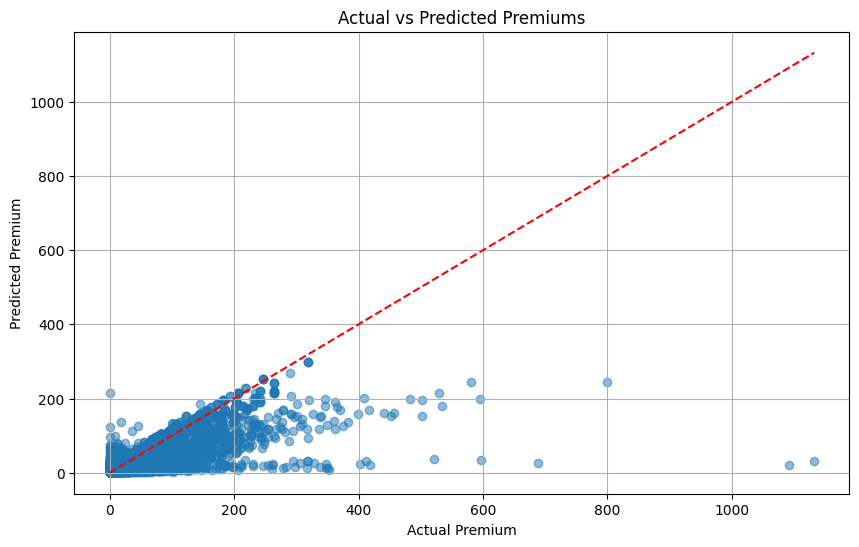

In [99]:
# prompt: plot predicted and actual

import matplotlib.pyplot as plt

# Assuming 'comparison_df' is your DataFrame from the preceding code

# Scatter plot of actual vs predicted premiums
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Premium_rate'], comparison_df['Premium_pred'], alpha=0.5)
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title('Actual vs Predicted Premiums')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(comparison_df['Premium_rate']), max(comparison_df['Premium_rate'])],
         [min(comparison_df['Premium_rate']), max(comparison_df['Premium_rate'])],
         linestyle='--', color='red')

plt.show()
